In [5]:
from sympy import *
from IPython.display import *
init_printing()
var('a:z')
var('A:Z');

In [6]:
alpha=Symbol('alpha',positive=True)
V=-log(1-2*alpha*z+z**2)
Z=solve(V-v,z)[0]
Z

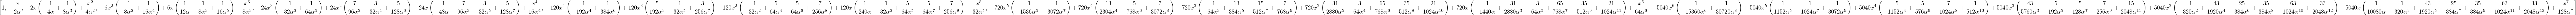

In [11]:
N=8
p=[]
f=series(exp(x*Z),v,0,N)
for i in range(N):
    p.append(factorial(i)*f.coeff(v,i).collect(x))
p

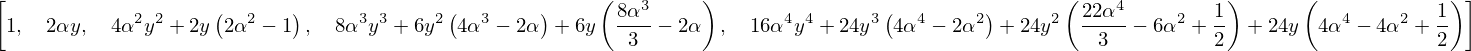

In [12]:
N=8
q=[]
f=series(exp(y*V),z,0,N)
for i in range(N):
    q.append(factorial(i)*f.coeff(z,i).collect(y))
q[:5]

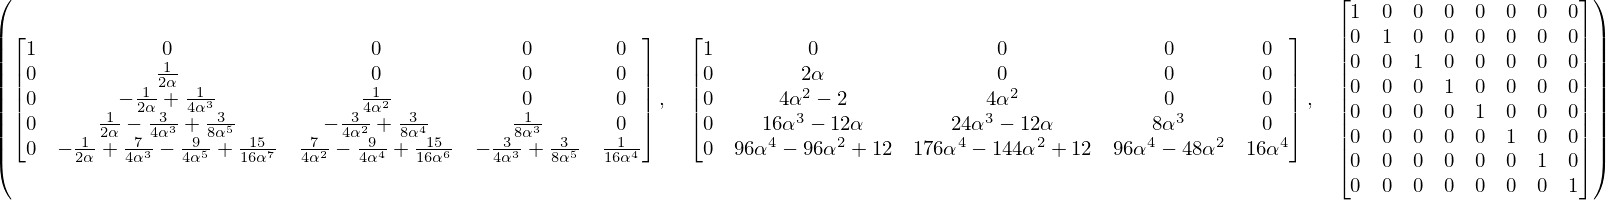

In [13]:
PCF=Matrix(N,N,lambda n,k: p[n].coeff(x,k))
QCF=Matrix(N,N,lambda n,k: q[n].coeff(y,k))
PCF[:5,:5],QCF[:5,:5],simplify(PCF*QCF)

In [14]:
qa=[]
for n in range(N):
    qa.append(bool(sum(p[n-k]*p[k].subs(x,y)*binomial(n,k) for k in range(n+1)).expand()-p[n].subs(x,x+y).expand()==0))
qa    

[True, True, True, True, True, True, True, True]

In [15]:
m=PCF.shape[0]
W=[]
WW=[]
for n in range(m):
    W.append(zeros(m,m))
    WW.append(zeros(m,m))
    for k in range(floor(m/2)):
        for l in range(floor(m/2)):
            W[n][k,l]=simplify(sum(binomial(n,j)*PCF[n-j,k]*PCF[j,l] for j in range(n+1)))
            WW[n][k,l]=PCF[n,k+l]*binomial(k+l,l)
[(simplify(W[a]-WW[a])).is_zero for a in range(m)]

[True, True, True, True, True, True, True, True]

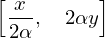

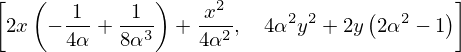

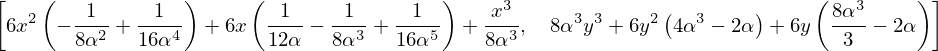

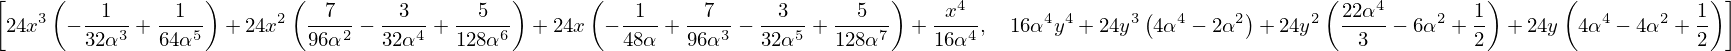

In [16]:
for i in range(5):
    display([p[i],q[i]])

In [17]:
yy=[]
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+p[m].coeff(x,i)*q[i]
    yy.append(simplify(g))    

display(yy)
    
xx=[]    
for m in range(N):
    g=0
    for i in range(m+1):
       g=g+q[m].coeff(y,i)*p[i] 
    xx.append(simplify(g))
    
display(xx)    

In [18]:
from sympy.functions.combinatorial.numbers import stirling
%store -r B
display([simplify(sum(stirling(n,k)*(-1)**(n-k)*(2*alpha**2)**(-k)*B[k].subs(x,alpha*x) for k in range(0,n+1))-p[n]) for n in range(0,N)])
[simplify(gegenbauer(n,y,alpha)*factorial(n)-q[n]) for n in range(0,N)]

In [19]:
%store -r B
display(B)

P-polynomials:
$$p_n(x)=
\sum_{k=0}^n S(n,k)(-1)^{n-k}(2\alpha^2)^{-k} p_k^{\rm Bessel}(\alpha x)$$

Q-polynomials are Gegenbauer polynomials:
$$q_n(y)=n!C_n^{(y)}(\alpha)=2^n\sum_{k=0}^{\lfloor n/2 \rfloor}\binom{n}{2k}\frac{(2k)!}{2^{2k}\,k!}(-1)^k(y)_{n-k}(\alpha)^{n-2k}$$
    

In [35]:
for n in range(0,N,2):
    display(simplify(q[n]-(-2)**n*sum(binomial(n,2*k)*ff(-y,n-k)*factorial(2*k)/factorial(k)/4**k*(alpha)**(n-2*k) for k in range(Rational(n/2)+1))).collect(y))

In [36]:
for n in range(1,N,2):
    display(simplify(q[n]-(-2)**n*sum(binomial(n,2*k)*ff(-y,n-k)*factorial(2*k)/factorial(k)/4**k*(alpha)**(n-2*k) for k in range(Rational((n-1)/2)+1))).collect(y))

In [65]:
for n in range(N-1):
    display(simplify((expand(2*alpha*(y+n)*q[n]-n*(2*y+n-1)*q[n-1])).collect(y)-q[n+1]))